### 2.a.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [ ]:
np.random.seed(42)
n_samples = 300
X = np.random.randn(n_samples, 2)

y = (X[:, 0] + X[:, 1] > 0).astype(int) 

### 2.b.

In [7]:
train_end = int(0.7 * n_samples)
val_end = int(0.8 * n_samples)

X_train, y_train = X[:train_end], y[:train_end]
X_val, y_val = X[train_end:val_end], y[train_end:val_end]
X_test, y_test = X[val_end:], y[val_end:]

### 2.c.

In [8]:
# Add bias term (x0 = 1)
def add_bias(X):
    bias = np.ones((X.shape[0], 1))
    return np.hstack((bias, X))

X_train_b = add_bias(X_train)
X_val_b = add_bias(X_val)
X_test_b = add_bias(X_test)

print(X_train_b)

[[ 1.          0.49671415 -0.1382643 ]
 [ 1.          0.64768854  1.52302986]
 [ 1.         -0.23415337 -0.23413696]
 [ 1.          1.57921282  0.76743473]
 [ 1.         -0.46947439  0.54256004]
 [ 1.         -0.46341769 -0.46572975]
 [ 1.          0.24196227 -1.91328024]
 [ 1.         -1.72491783 -0.56228753]
 [ 1.         -1.01283112  0.31424733]
 [ 1.         -0.90802408 -1.4123037 ]
 [ 1.          1.46564877 -0.2257763 ]
 [ 1.          0.0675282  -1.42474819]
 [ 1.         -0.54438272  0.11092259]
 [ 1.         -1.15099358  0.37569802]
 [ 1.         -0.60063869 -0.29169375]
 [ 1.         -0.60170661  1.85227818]
 [ 1.         -0.01349722 -1.05771093]
 [ 1.          0.82254491 -1.22084365]
 [ 1.          0.2088636  -1.95967012]
 [ 1.         -1.32818605  0.19686124]
 [ 1.          0.73846658  0.17136828]
 [ 1.         -0.11564828 -0.3011037 ]
 [ 1.         -1.47852199 -0.71984421]
 [ 1.         -0.46063877  1.05712223]
 [ 1.          0.34361829 -1.76304016]
 [ 1.          0.32408397

In [9]:
def perceptron_train(X, y, epochs=50, w_init=None):
    n_samples, n_features = X.shape
    if w_init is None:
        w = np.random.uniform(-0.5, 0.5, n_features)
    else:
        w = w_init.copy()

    for epoch in range(epochs):
        errors = 0
        for i in range(n_samples):
            xi = X[i]
            target = y[i]
            activation = np.dot(w, xi)

            if activation <= 0 and target == 1:
                w = w + xi
                errors += 1
            elif activation >= 0 and target == 0:
                w = w - xi
                errors += 1

        if errors == 0:
            break
    return w

In [10]:
def perceptron_predict(X, w):
    activations = np.dot(X, w)
    return (activations >= 0).astype(int)

### 2.d.

In [11]:
epoch_list = [50, 100, 150]
results = []

for seed in [1, 10, 100]:
    np.random.seed(seed)
    w_init = np.random.uniform(-0.5, 0.5, 3)

    for epochs in epoch_list:
        w_trained = perceptron_train(X_train_b, y_train, epochs, w_init)
        y_pred = perceptron_predict(X_test_b, w_trained)

        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)

        results.append({
            'init_seed': seed,
            'epochs': epochs,
            'precision': precision,
            'recall': recall,
            'accuracy': accuracy
        })


=== Performance Results ===
   init_seed  epochs  precision  recall  accuracy
0          1      50   1.000000     1.0  1.000000
1          1     100   1.000000     1.0  1.000000
2          1     150   1.000000     1.0  1.000000
3         10      50   0.913043     1.0  0.966667
4         10     100   0.913043     1.0  0.966667
5         10     150   0.913043     1.0  0.966667
6        100      50   0.913043     1.0  0.966667
7        100     100   0.913043     1.0  0.966667
8        100     150   0.913043     1.0  0.966667


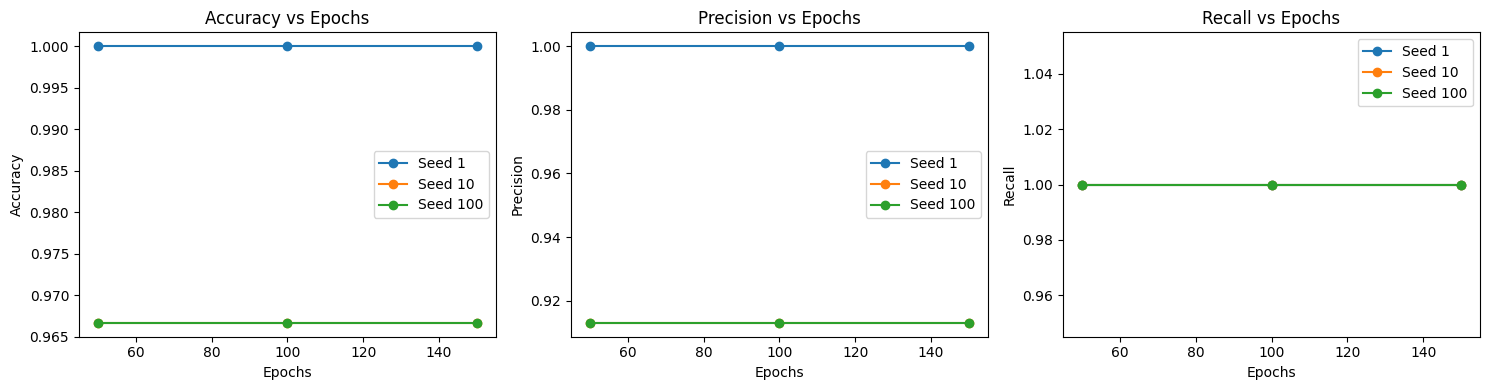

In [14]:
df = pd.DataFrame(results)
print("\n=== Performance Results ===")
print(df)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
metrics = ['accuracy', 'precision', 'recall']

for i, metric in enumerate(metrics):
    for seed in df['init_seed'].unique():
        subset = df[df['init_seed'] == seed]
        axes[i].plot(subset['epochs'], subset[metric], marker='o', label=f'Seed {seed}')
    axes[i].set_title(metric.capitalize() + " vs Epochs")
    axes[i].set_xlabel("Epochs")
    axes[i].set_ylabel(metric.capitalize())
    axes[i].legend()

plt.tight_layout()
plt.savefig('plots/2d_perceptron_metrics.png', dpi=100, bbox_inches='tight')
plt.show()